In [1]:
# !pip install wordcloud
# !pip install multidict

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import os
from os import path
import MeCab
import unidic
import sys
import re
import unicodedata
import matplotlib.pyplot as plt
import tqdm
import japanize_matplotlib
import collections
import glob
import multidict as multidict
from wordcloud import STOPWORDS as JA_STOPWORDS

## wordcloud for all words

In [3]:
# Create wordcloud image for every words
fields = ['word',"total"]
## CHANGE FILE NAME!!!
text_all = pd.read_csv('f_scientist_text_overall.csv', encoding='UTF-8',usecols=fields)
text_all.set_index("word").to_dict()
text_all_dict = text_all.set_index("word").to_dict()['total']

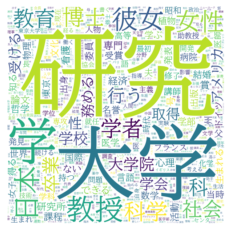

In [4]:
wc = WordCloud(background_color="white", \
               max_words=1000,font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=600,height=600)

# generate word cloud
wc.generate_from_frequencies(text_all_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_fScientist_all.png")


In [5]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.querySelectorAll("svg text").forEach(element => {
    element.addEventListener("click", function() {
        word = this.textContent;
        word_uri = encodeURI(word);
        url = "https://jisho.org/search/" + word_uri;
        window.open(url, "_blank");
    })
})
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("femaleScientictAll.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

## Noun wordcloud

In [6]:
# create wc for noun(名詞)
df = pd.read_csv('f_scientist_text_overall.csv', encoding='UTF-8')
noun = df[df.pos == "名詞"]
noun2 = noun.drop("pos", axis=1)
noun2.head()

,word,total,articles
0,研究,4261,966
1,大学,2918,849
2,学,2900,878
3,教授,2275,867
4,日本,2220,804


In [7]:
noun2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19222 entries, 0 to 21814
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   word      19222 non-null  object
 1   total     19222 non-null  int64 
 2   articles  19222 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 600.7+ KB


In [8]:
noun_dict = noun2.set_index("word").to_dict()['total']

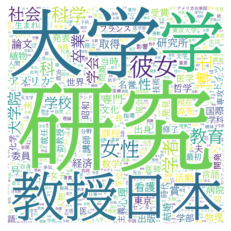

In [9]:
wc = WordCloud(background_color="white", \
               max_words=1000,font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=600,height=600)

# generate word cloud
## CHANGE (blah)
wc.generate_from_frequencies(noun_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_fScientist_noun.png")


In [10]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.querySelectorAll("svg text").forEach(element => {
    element.addEventListener("click", function() {
        word = this.textContent;
        word_uri = encodeURI(word);
        url = "https://jisho.org/search/" + word_uri;
        window.open(url, "_blank");
    })
})
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("femaleScientictNoun.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

## Verb

In [11]:
# verb (動詞)
df = pd.read_csv('f_scientist_text_overall.csv', encoding='UTF-8')
## CHANGE POS
verb = df[df.pos == "動詞"]
verb2 = verb.drop("pos", axis=1)
verb2.head()

,word,total,articles
14,行う,910,401
18,受ける,757,316
21,務める,748,420
31,できる,634,216
38,生まれる,547,439


In [12]:
verb2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2322 entries, 14 to 21792
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   word      2322 non-null   object
 1   total     2322 non-null   int64 
 2   articles  2322 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 72.6+ KB


In [13]:
verb_dict = verb2.set_index("word").to_dict()['total']

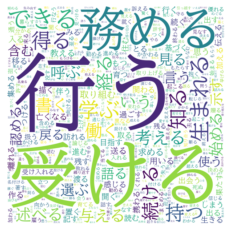

In [14]:
wc = WordCloud(background_color="white", \
               max_words=500, #change if needed\
               font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=600,height=600)

# generate word cloud
## CHANGE (blah)
wc.generate_from_frequencies(verb_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_fScientist_verb.png")

In [15]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.querySelectorAll("svg text").forEach(element => {
    element.addEventListener("click", function() {
        word = this.textContent;
        word_uri = encodeURI(word);
        url = "https://jisho.org/search/" + word_uri;
        window.open(url, "_blank");
    })
})
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("femaleScientictVerb.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

## Adjective

In [16]:
# adj (形容詞)
df = pd.read_csv('f_scientist_text_overall.csv', encoding='UTF-8')
## CHANGE POS
adj = df[df.pos == "形容詞"]
adj2 = adj.drop("pos", axis=1)
adj2.head()

,word,total,articles
34,ない,586,218
238,強い,166,108
251,多い,158,93
271,高い,147,97
278,新しい,142,90


In [17]:
adj2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 34 to 21778
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   word      271 non-null    object
 1   total     271 non-null    int64 
 2   articles  271 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.5+ KB


In [18]:
adj_dict = adj2.set_index("word").to_dict()['total']

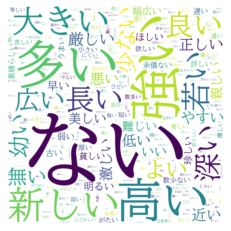

In [19]:
wc = WordCloud(background_color="white", \
               max_words=500, #change if needed\
               font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=600,height=600)

# generate word cloud
## CHANGE (blah)!!!!
wc.generate_from_frequencies(adj_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_fScientist_adj.png")

In [23]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
        svg = document.querySelectorAll("svg text").forEach(element => {
    element.addEventListener("click", function() {
        word = this.textContent;
        word_uri = encodeURI(word);
        url = "https://jisho.org/search/" + word_uri;
        window.open(url, "_blank");
    })
})
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("femaleScientistAdj.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

In [20]:
#test
# adj3 = adj2[adj2.word != "ない"]
# adj_dict3 = adj3.set_index("word").to_dict()['total']

In [21]:

# wc2 = WordCloud(background_color="white", \
#                max_words=2000, #change if needed\
#                font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
#                width=600,height=600,\
#                 collocations=False, \
#                 colormap='inferno', stopwords= words)

# # generate word cloud
# ## CHANGE (blah)!!!!
# wc2.generate_from_frequencies(adj_dict3)

# # show
# plt.imshow(wc2, interpolation="bilinear")
# plt.axis("off")
# plt.show()

In [22]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
# wc.to_svg()

# # JavaScript to link each word
# link_script = """
# <script>
#     svg = document.querySelectorAll("svg text").forEach(element => {
#     element.addEventListener("click", function() {
#         word = this.textContent;
#         word_uri = encodeURI(word);
#         url = "https://jisho.org/search/" + word_uri;
#         window.open(url, "_blank");
#     })
# })
# </script>"""

# # HTML
# ## CHANGE FILE NAME!!!
# with open("femaleScientictAdj.html", "w", encoding='UTF-8') as f:
#     f.write("<!DOCTYPE HTML>\n")
#     f.write(wc.to_svg())
#     f.write(link_script)